### RNNLM 구현

In [2]:
import numpy as np
xs = np.array([[1,2,3]])
print(xs.shape)
print(xs[:,0])
print(xs[:,0].shape)
W = np.arange(28).reshape(7,4)
print(W[0])
print(W[[0]])

(1, 3)
[1]
(1,)
[0 1 2 3]
[[0 1 2 3]]


In [ ]:
a = np.array([1,2,3])
a = a.reshape(-1,1)
print(a)

In [5]:
a = np.array([1,1,1])
print(a.shape)
a = a[:, np.newaxis]
print(a.shape)
print(a)

(3,)
(3, 1)
[[1]
 [1]
 [1]]


In [7]:
a = np.array([1,2,3])
print(a.shape)
a = a[np.newaxis, :]
print(a)
print(a.shape)

(3,)
[[1 2 3]]
(1, 3)


In [ ]:
a = np.array([[1,2],
              [3,4]])
# b = 3
# b = np.array([2,2])
b = np.array([[2],[2]])
a+b   # (2,2) + (2,1) => (2,2) + (2,2)

In [13]:
import numpy as np
dx = np.arange(21).reshape(3,7)
mask = np.ones((3,))
mask[2] = 0
print(mask)
print(mask.shape)
print(mask.reshape(3,1).shape)
print(mask[:, np.newaxis].shape)

dx * mask[:, np.newaxis]  # (3,7)*(3,1) => (3,7)*(3,7)

[1. 1. 0.]
(3,)
(3, 1)
(3, 1)


array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

D=4
H=3
rnn_Wx = np.arange(D*H).reshape(D,H)
rnn_Wh = np.arange(H*H).reshape(H,H)
rnn_b = np.arange(H)

rnn = RNN(rnn_Wx, rnn_Wh, rnn_b)
print(rnn.params[0])
print(rnn.params[1])
print(rnn.params[2])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2]


In [25]:
a = (1,2)
print(type(a))
b = 1,2
print(type(b))
a,b = (1,2)
print(type(a))

def foo():
    return 1,2

a,b = foo()
print(a,b)

def foo(a,b):
    print(a,b)
    
# foo((1,2))
foo(*(1,2))


a = np.arange(3*4).reshape(3,4)
print(a.shape)
b = np.random.rand(*a.shape) # 명시적인 튜플 언패킹
print(a)
print(b)

<class 'tuple'>
<class 'tuple'>
<class 'int'>
1 2
1 2
(3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0.45369879 0.47279946 0.85569916 0.46495293]
 [0.23725553 0.41315591 0.44251139 0.49639759]
 [0.47449955 0.75562638 0.11056381 0.33305221]]


In [26]:
class AAA:
    def __init__(self):
        self.x = 10
        y = 20
        print('__init__()', self)
        
    def foo(self):
        print(self.x)
#         print(y)
        
a = AAA()
print(a)
a.foo()  

__init__() <__main__.AAA object at 0x000002A6A9635670>
10


In [31]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

xs = np.random.randn(3,7)
ts = np.array([1,2,3])
ys = softmax(xs)
print(ys)
print(np.sum(ys, axis=1))

print(ys[np.arange(1 * 3), ts])
ls = np.log(ys[np.arange(1 * 3), ts])
print(ls)
loss = -np.sum(ls)
print(loss)
loss /= 3
print(loss)

[[0.11686678 0.1858278  0.11444953 0.11465521 0.1641967  0.14409871
  0.15990527]
 [0.20680741 0.1419546  0.18255003 0.04076485 0.05796703 0.33204228
  0.03791379]
 [0.0502831  0.2693912  0.10059203 0.05828462 0.23813702 0.07507458
  0.20823746]]
[1. 1. 1.]
[0.1858278  0.18255003 0.05828462]
[-1.68293484 -1.70073101 -2.84241706]
6.226082909832506
2.075360969944169


In [32]:
mask = np.array([1,1,1])
print(mask)
print(mask.shape)
# print(mask.reshape(-1,1).shape)
print(mask[:, np.newaxis].shape)
print(mask[:, np.newaxis])

[1 1 1]
(3,)
(3, 1)
[[1]
 [1]
 [1]]


In [36]:
dx = np.arange(21).reshape(3,7)
print(dx)
mask = np.array([1,1,1])
dx *= mask[:, np.newaxis]
print(dx)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]


In [37]:
for i in reversed(range(3)):
    print(i)

2
1
0


In [38]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

### RNNLM의 학습 코드

In [47]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

corpus, word_to_id, id_to_word = ptb.load_data('train')
print(corpus.shape)
print(corpus[:100])
print(type(word_to_id))
print(len(word_to_id))
print(id_to_word[30])

for i in range(100):
    print(id_to_word[corpus[i]], end=' ')
print()

print(word_to_id['centrust'])

vocab_size = int(max(corpus) + 1)
print('말뭉치 크기: %d, 어휘 수: %d' % (len(corpus), vocab_size))
print(len(word_to_id))

(929589,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 27 24 39 26 40 41 42 26 43
 32 44 45 46 24 47 26 27 28 29 48 49 41 42 50 51 52 53 54 55 35 36 37 42
 56 57 58 59 24 35 60 42 61 62 63 64 65 66 67 68 69 70 35 71 72 42 73 74
 75 35 46 42]
<class 'dict'>
10000
will
aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join the board as a nonexecutive director nov. N <eos> mr. <unk> is chairman of <unk> n.v. the dutch publishing group <eos> rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate <eos> a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of 
4
말뭉치 크기: 929589, 어휘 수: 10000
10000


418
말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 364.59
| 에폭 2 | 퍼플렉서티 247.39
| 에폭 3 | 퍼플렉서티 219.54
| 에폭 4 | 퍼플렉서티 213.15
| 에폭 5 | 퍼플렉서티 204.82
| 에폭 6 | 퍼플렉서티 202.07
| 에폭 7 | 퍼플렉서티 198.56
| 에폭 8 | 퍼플렉서티 196.51
| 에폭 9 | 퍼플렉서티 191.05
| 에폭 10 | 퍼플렉서티 192.38
| 에폭 11 | 퍼플렉서티 189.30
| 에폭 12 | 퍼플렉서티 191.83
| 에폭 13 | 퍼플렉서티 188.84
| 에폭 14 | 퍼플렉서티 188.80
| 에폭 15 | 퍼플렉서티 188.54
| 에폭 16 | 퍼플렉서티 186.50
| 에폭 17 | 퍼플렉서티 183.14
| 에폭 18 | 퍼플렉서티 180.75
| 에폭 19 | 퍼플렉서티 182.35
| 에폭 20 | 퍼플렉서티 184.90
| 에폭 21 | 퍼플렉서티 181.45
| 에폭 22 | 퍼플렉서티 177.38
| 에폭 23 | 퍼플렉서티 175.72
| 에폭 24 | 퍼플렉서티 176.34
| 에폭 25 | 퍼플렉서티 173.83
| 에폭 26 | 퍼플렉서티 172.35
| 에폭 27 | 퍼플렉서티 169.37
| 에폭 28 | 퍼플렉서티 167.71
| 에폭 29 | 퍼플렉서티 165.00
| 에폭 30 | 퍼플렉서티 160.48
| 에폭 31 | 퍼플렉서티 159.40
| 에폭 32 | 퍼플렉서티 156.45
| 에폭 33 | 퍼플렉서티 154.93
| 에폭 34 | 퍼플렉서티 153.16
| 에폭 35 | 퍼플렉서티 148.99
| 에폭 36 | 퍼플렉서티 139.96
| 에폭 37 | 퍼플렉서티 136.70
| 에폭 38 | 퍼플렉서티 133.22
| 에폭 39 | 퍼플렉서티 131.98
| 에폭 40 | 퍼플렉서티 123.73
| 에폭 41 | 퍼플렉서티 123.49
| 에폭 42 | 퍼플렉서티 119.03
| 에폭 43 | 퍼플렉서티

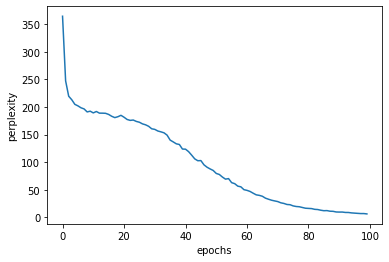

In [48]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 1. (N,T) 로 입력
# 2. (N,T) => (N,T,D)  임베딩층 통과 시
# 3. (N,H)(H,H)+(N,D)(D,H)+(H,) => (N,H) => (N,T,H)  RNN 층 통과 시

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
# print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
print(vocab_size)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [49]:
model.layers[0].W[1]

array([ 0.01551541,  0.01555565,  0.01596183,  0.04066   ,  0.02988104,
       -0.02094981,  0.01352789,  0.023273  ,  0.02277292,  0.03834406,
        0.02830946,  0.01341417,  0.01932197,  0.03359631,  0.01468777,
       -0.01215107, -0.00737302, -0.01872111, -0.00126686, -0.00562144,
        0.01881046, -0.04253429,  0.03262767, -0.02648862, -0.03517184,
        0.05870563,  0.00867787, -0.04585668, -0.00818034,  0.00333629,
       -0.00590994,  0.00816354, -0.00466012, -0.05360024, -0.0023127 ,
       -0.06308766, -0.00607892,  0.03567948, -0.00893974,  0.03231809,
       -0.00613747,  0.07406249,  0.00272964,  0.02035144, -0.01356665,
        0.02752777, -0.03759973, -0.06910811, -0.00112989,  0.05154888,
        0.03766673,  0.01384205, -0.03965329,  0.01181692,  0.01193716,
       -0.01775798, -0.00520439,  0.00012067, -0.03181111, -0.04020225,
        0.04820336, -0.00433021, -0.00610336,  0.01561496, -0.00662004,
        0.00758624,  0.00516223, -0.05492619,  0.03387753, -0.04

### RNNLM의 Trainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 415.44
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 386.19
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 266.12
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 221.41
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 210.58
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 208.76
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.37
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.33
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.52
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.50
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.89
| 에폭 12 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 189.66
| 에폭 13 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 192.90
| 에폭 14 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 188.31
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 187.73
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 191.66
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 190.03
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 185.09
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 182.06
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 182.33
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.81
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.

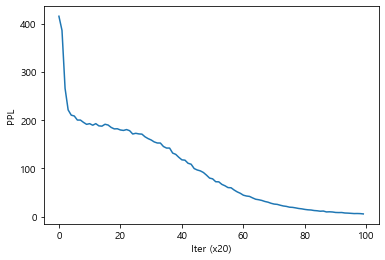

In [50]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


In [54]:
import numpy as np

out = np.zeros((2,3,4))
embed_W = np.arange(28).reshape(7,4)
print(embed_W)
idx = [0,3]
out[:,0,:] = embed_W[idx]
print(out)
idx = [1,4]
out[:,1,:] = embed_W[idx]
print(out)
idx = [2,1]
out[:,2,:] = embed_W[idx]

print(out)



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]
[[[ 0.  1.  2.  3.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[12. 13. 14. 15.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]
[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 0.  0.  0.  0.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [ 0.  0.  0.  0.]]]
[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [ 4.  5.  6.  7.]]]


In [56]:
import numpy as np

xs = np.arange(18).reshape(2,3,3)
print(xs)
rx  = xs.reshape(2*3,-1)
print(rx)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]
